In [20]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [21]:
mat = sio.loadmat('./data/ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1','X2'])
data['y'] = mat.get('y')
data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


# visualize data
pay attention to the edge case at the left hand side

Text(0,0.5,'X2')

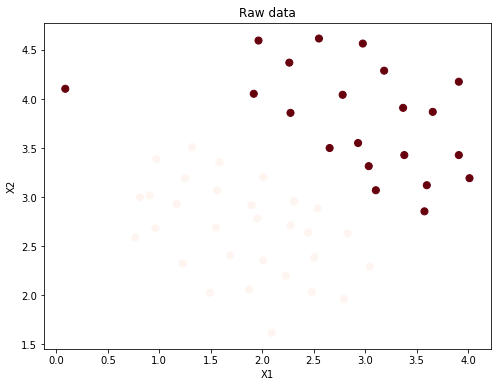

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], cmap='Reds')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')


# try $C=1$
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [26]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1','X2']], data['y'])

0.98039215686274506

In [28]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

Text(0.5,1,'SVM (C=1) Decision Confidence')

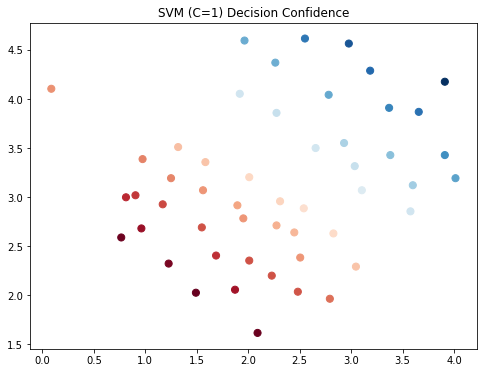

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')

# try $C=100$
with large C, you try to overfit the data, so the left hand side edge case now is categorized right

In [30]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1','X2']], data['y'])

0.94117647058823528

In [31]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

Text(0.5,1,'SVM (C=100) Decision Confidence')

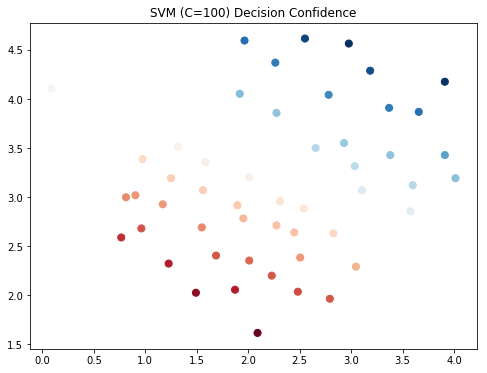

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')

In [33]:
data.head()

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.9643,4.5957,1,0.800059,3.006064
1,2.2753,3.8589,1,0.382187,1.241937
2,2.9781,4.5651,1,1.374711,4.087324
3,2.9320,3.5519,1,0.519855,1.114917
4,3.5772,2.8560,1,0.333064,-0.145867
